# Trump's Twitter History
## Kasra Samadi, Behnoosh Behyani, Mohammad Eshagh

## Table of Content
#### 1- Import Packages  
#### 2- Extracting Hashtags and Mentions  
#### 3- Sentiment Analysis 
#### 4- Tokenize and get keywords using spacy 
#### 5- Create Word Cloud
#### 6- TFIDF

## 1- Import Packages

In [1]:
import pandas as pd
import numpy as np
import os
import re
from matplotlib import pyplot as plt
import spacy
from textblob import TextBlob
from wordcloud import WordCloud

In [26]:
tweets = pd.read_csv('tweets.csv')
tweets

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f
...,...,...,...,...,...,...,...,...,...
56566,1319485303363571714,RT @RandPaul: I don’t know why @JoeBiden think...,t,f,Twitter for iPhone,0,20683,2020-10-23 03:46:25,f
56567,1319484210101379072,RT @EliseStefanik: President @realDonaldTrump ...,t,f,Twitter for iPhone,0,9869,2020-10-23 03:42:05,f
56568,1319444420861829121,RT @TeamTrump: LIVE: Presidential Debate #Deba...,t,f,Twitter for iPhone,0,8197,2020-10-23 01:03:58,f
56569,1319384118849949702,Just signed an order to support the workers of...,f,f,Twitter for iPhone,176289,36001,2020-10-22 21:04:21,f


In [3]:
tweets.shape

(56571, 9)

In [4]:
tweets.isna().sum()

id           0
text         0
isRetweet    0
isDeleted    0
device       0
favorites    0
retweets     0
date         0
isFlagged    0
dtype: int64

## 2- Extracting Hashtags and Mentions  
extract hastags and mentions using python's re.
https://stackoverflow.com/questions/45874879/extract-hashtags-from-columns-of-a-pandas-dataframe

In [5]:
# Extract Hashtags and mentions from tweets
tweets['mentions'] = tweets['text'].str.findall(r'(?:(?<=\s)|(?<=^))@.*?(?=\s|$)')
tweets['hashtags'] = tweets['text'].str.findall(r'(?:(?<=\s)|(?<=^))#.*?(?=\s|$)')

In [6]:
tweets

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,mentions,hashtags
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f,[],[]
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f,[],[#KAG2020]
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f,[@CBS_Herridge:],[]
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f,[],[]
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f,[@MZHemingway:],[]
...,...,...,...,...,...,...,...,...,...,...,...
56566,1319485303363571714,RT @RandPaul: I don’t know why @JoeBiden think...,t,f,Twitter for iPhone,0,20683,2020-10-23 03:46:25,f,"[@RandPaul:, @JoeBiden]",[]
56567,1319484210101379072,RT @EliseStefanik: President @realDonaldTrump ...,t,f,Twitter for iPhone,0,9869,2020-10-23 03:42:05,f,"[@EliseStefanik:, @realDonaldTrump]",[]
56568,1319444420861829121,RT @TeamTrump: LIVE: Presidential Debate #Deba...,t,f,Twitter for iPhone,0,8197,2020-10-23 01:03:58,f,[@TeamTrump:],[#Debates2020]
56569,1319384118849949702,Just signed an order to support the workers of...,f,f,Twitter for iPhone,176289,36001,2020-10-22 21:04:21,f,[],[]


In [7]:
hashtags = {}
for index, row in tweets.iterrows():
    hashtag = row['hashtags']
    if type(hashtag) == type(float(np.nan)):
        continue
    hashtag_list = hashtag
    for key in hashtag_list:
        if key in hashtags:
            hashtags[key] += 1
        else:
            hashtags[key] = 1

sorted_hashtags = dict(sorted(hashtags.items(), key=lambda x: x[1], reverse=True))

hashtags_items = list(sorted_hashtags.items())
# Slice the list to get the first 50 key-value pairs
first_50_hashtags_items = hashtags_items[:50]

print(f'Number of Hashtag types: {(len(sorted_hashtags))}')
hashtags, count = first_50_hashtags_items[0]
print(f'{hashtags}: {count}')

Number of Hashtag types: 4021
#Trump2016: 434


In [8]:
tweets

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,mentions,hashtags
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f,[],[]
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f,[],[#KAG2020]
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f,[@CBS_Herridge:],[]
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f,[],[]
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f,[@MZHemingway:],[]
...,...,...,...,...,...,...,...,...,...,...,...
56566,1319485303363571714,RT @RandPaul: I don’t know why @JoeBiden think...,t,f,Twitter for iPhone,0,20683,2020-10-23 03:46:25,f,"[@RandPaul:, @JoeBiden]",[]
56567,1319484210101379072,RT @EliseStefanik: President @realDonaldTrump ...,t,f,Twitter for iPhone,0,9869,2020-10-23 03:42:05,f,"[@EliseStefanik:, @realDonaldTrump]",[]
56568,1319444420861829121,RT @TeamTrump: LIVE: Presidential Debate #Deba...,t,f,Twitter for iPhone,0,8197,2020-10-23 01:03:58,f,[@TeamTrump:],[#Debates2020]
56569,1319384118849949702,Just signed an order to support the workers of...,f,f,Twitter for iPhone,176289,36001,2020-10-22 21:04:21,f,[],[]


## 3- Sentiment Analysis 

1) Clean the text, lemminize.  
2) Extract 'Polerization' Score.  
3) Simplfy the Polerization into 'Positive', 'Neutral', and 'Negative' 

In [9]:
# Cleaing features from the tweets
processed_features = []
for sentence in tweets['text']:
    # Remove all the http: urls
    processed_feature = re.sub('(https?://\S+)', '', str(sentence))
    
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', processed_feature)
 
    #Converting to Lowercase
    processed_feature = processed_feature.lower()
    
    processed_features.append(processed_feature)

In [10]:
# get the polarity score
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

# Create 'Polarity' column 
tweets['polarity'] = pd.Series(processed_features).apply(getPolarity)

In [11]:
tweets

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,mentions,hashtags,polarity
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f,[],[],0.200000
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f,[],[#KAG2020],0.450000
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f,[@CBS_Herridge:],[],0.050000
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f,[],[],0.029464
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f,[@MZHemingway:],[],0.268750
...,...,...,...,...,...,...,...,...,...,...,...,...
56566,1319485303363571714,RT @RandPaul: I don’t know why @JoeBiden think...,t,f,Twitter for iPhone,0,20683,2020-10-23 03:46:25,f,"[@RandPaul:, @JoeBiden]",[],0.200000
56567,1319484210101379072,RT @EliseStefanik: President @realDonaldTrump ...,t,f,Twitter for iPhone,0,9869,2020-10-23 03:42:05,f,"[@EliseStefanik:, @realDonaldTrump]",[],0.050000
56568,1319444420861829121,RT @TeamTrump: LIVE: Presidential Debate #Deba...,t,f,Twitter for iPhone,0,8197,2020-10-23 01:03:58,f,[@TeamTrump:],[#Debates2020],0.136364
56569,1319384118849949702,Just signed an order to support the workers of...,f,f,Twitter for iPhone,176289,36001,2020-10-22 21:04:21,f,[],[],-0.035714


In [12]:
def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'
tweets['analysis'] = tweets['polarity'].apply(getAnalysis)

In [13]:
tweets

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,mentions,hashtags,polarity,analysis
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f,[],[],0.200000,positive
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f,[],[#KAG2020],0.450000,positive
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f,[@CBS_Herridge:],[],0.050000,positive
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f,[],[],0.029464,positive
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f,[@MZHemingway:],[],0.268750,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56566,1319485303363571714,RT @RandPaul: I don’t know why @JoeBiden think...,t,f,Twitter for iPhone,0,20683,2020-10-23 03:46:25,f,"[@RandPaul:, @JoeBiden]",[],0.200000,positive
56567,1319484210101379072,RT @EliseStefanik: President @realDonaldTrump ...,t,f,Twitter for iPhone,0,9869,2020-10-23 03:42:05,f,"[@EliseStefanik:, @realDonaldTrump]",[],0.050000,positive
56568,1319444420861829121,RT @TeamTrump: LIVE: Presidential Debate #Deba...,t,f,Twitter for iPhone,0,8197,2020-10-23 01:03:58,f,[@TeamTrump:],[#Debates2020],0.136364,positive
56569,1319384118849949702,Just signed an order to support the workers of...,f,f,Twitter for iPhone,176289,36001,2020-10-22 21:04:21,f,[],[],-0.035714,negative


## 4- Tokenize and get keywords using spacy

In [14]:
# !python -m spacy download en_core_web_sm

In [15]:
spacy_model = spacy.load('en_core_web_sm')

In [16]:
# cleanTweet = []
# for tweet in processed_features:
#     tweet = spacy_model(tweet)
#     tokenTweet = []
#     for token in tweet:
#         if not token.is_punct and not token.is_stop and 
#              not token.like_num and token.lemma_ != '-PRON-':
#                 tokenTweet.append(token.lemma_)
#     cleanTweet.append(tokenTweet)
    
# import pickle
# file_path = 'cleanTweet.bin'
# # Open the file in binary mode
# with open(file_path, 'wb') as file:
#     pickle.dump(cleanTweet, file)

In [17]:
# Load the pickle file
import pickle
file_path = 'cleanTweet.bin'
with open(file_path, 'rb') as f:
    cleanTweet = pickle.load(f)

In [18]:
tweets['cleanText'] = cleanTweet

In [19]:
tweets

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,mentions,hashtags,polarity,analysis,cleanText
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f,[],[],0.200000,positive,"[republicans, democrats, create, economic, pro..."
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f,[],[#KAG2020],0.450000,positive,"[thrilled, great, city, charlotte, , north, c..."
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f,[@CBS_Herridge:],[],0.050000,positive,"[rt, , cbs_herridge, , read, , letter, surv..."
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f,[],[],0.029464,positive,"[unsolicited, mail, ballot, scam, major, threa..."
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f,[@MZHemingway:],[],0.268750,positive,"[rt, , mzhemingway, , friendly, telling, eve..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56566,1319485303363571714,RT @RandPaul: I don’t know why @JoeBiden think...,t,f,Twitter for iPhone,0,20683,2020-10-23 03:46:25,f,"[@RandPaul:, @JoeBiden]",[],0.200000,positive,"[rt, , randpaul, , don, t, know, , joebiden..."
56567,1319484210101379072,RT @EliseStefanik: President @realDonaldTrump ...,t,f,Twitter for iPhone,0,9869,2020-10-23 03:42:05,f,"[@EliseStefanik:, @realDonaldTrump]",[],0.050000,positive,"[rt, , elisestefanik, , president, , realdo..."
56568,1319444420861829121,RT @TeamTrump: LIVE: Presidential Debate #Deba...,t,f,Twitter for iPhone,0,8197,2020-10-23 01:03:58,f,[@TeamTrump:],[#Debates2020],0.136364,positive,"[rt, , teamtrump, , live, , presidential, d..."
56569,1319384118849949702,Just signed an order to support the workers of...,f,f,Twitter for iPhone,176289,36001,2020-10-22 21:04:21,f,[],[],-0.035714,negative,"[sign, order, support, worker, delphi, corpora..."


In [20]:
# Creates a list of all tokens (words)
wordList = []
for tweet in tweets['cleanText']:
    for word in tweet:
        if not word.isspace():
            wordList.append(word)

In [21]:
from collections import Counter
word_counts = Counter([word.lower() for word in wordList])
# Get the most common keywords
most_common_keywords = word_counts.most_common(50)

keyword, count = most_common_keywords[0]
print(f'{keyword}: {count}')

realdonaldtrump: 11168


## 5- Create Word Cloud

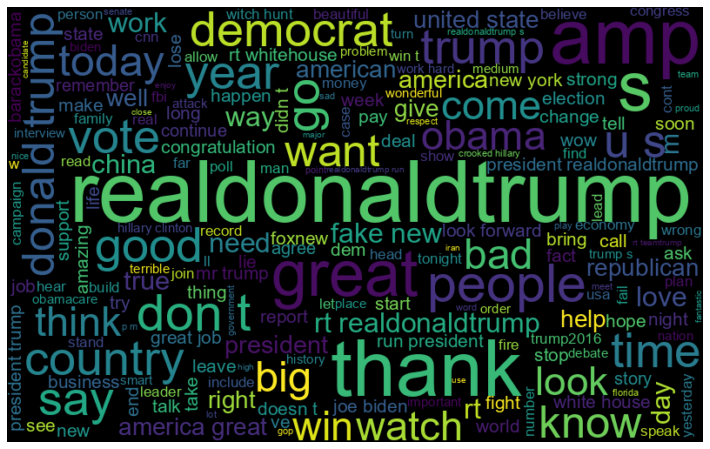

In [22]:
from wordcloud import WordCloud

# Convert the wordList into a single string
positive_words_str = ' '.join(wordList)
# Create the WordCloud object without specifying a font file path
wordcloud = WordCloud(width=800, height=500, max_font_size=100,
                      font_path="./arial.ttf").generate(positive_words_str)

%matplotlib inline
# Plot the graph
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 6- TF-IDF

In [23]:
import TF_IDF 
TF_IDF.documents_count = len(tweets)
for i in range(len(tweets)):
    TF_IDF.tf_create(tokens=tweets.loc[(i,'cleanText')], doc_name=i)
    
TF_IDF.TF_IDF_calculate()

In [24]:
query = "iran"
n = 3 # return Top n of tweets
results = TF_IDF.query_index(query)

print(f"Top {n} most relevant Tweets:")
for tweet_id, _ in results[:n]:
    print(f"tweet ID : {tweet_id} , TEXT: {tweets.loc[(tweet_id,'text')]}")

Top 3 most relevant Tweets:
tweet ID : 9196 , TEXT: IRAN WILL NEVER HAVE A NUCLEAR WEAPON!
tweet ID : 53998 , TEXT: Iran made a very big mistake!
tweet ID : 18045 , TEXT: Iran has never had a better friend than Obama.


In [25]:
tweet_id = 18045
tweets.loc[(tweet_id)]

id                                       409048194413109248
text         Iran has never had a better friend than Obama.
isRetweet                                                 f
isDeleted                                                 f
device                                   Twitter Web Client
favorites                                               578
retweets                                                447
date                                    2013-12-06 19:54:23
isFlagged                                                 f
mentions                                                 []
hashtags                                                 []
polarity                                                0.5
analysis                                           positive
cleanText                       [iran, well, friend, obama]
Name: 18045, dtype: object